# Descriptive Statistics in Data Analysis

This notebook explores fundamental concepts of descriptive statistics and their implementation in Python with practical examples. Descriptive statistics help us understand and summarize data through numerical calculations and visualizations.

## 1. Import Required Libraries

First, let's import the necessary Python libraries that will help us work with data and perform statistical calculations.

In [1]:
# Import libraries for data manipulation and analysis
import numpy as np
import pandas as pd
from scipy import stats

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

## 2. Understanding Descriptive Statistics

Descriptive statistics summarize and describe the main features of a dataset quantitatively. They provide simple summaries about the sample and the measures. Together with simple graphics analysis, they form the basis of virtually every quantitative analysis of data.

Key purposes of descriptive statistics:
- Summarize large datasets into interpretable values
- Identify patterns in the data
- Understand the distribution and spread of data
- Detect outliers and anomalies
- Form the foundation for further statistical analysis

Let's create some sample datasets that we'll use throughout this notebook:

In [2]:
# Create a sample dataset representing student exam scores
np.random.seed(42)  # For reproducibility
exam_scores = np.random.normal(70, 15, 100).round(1)  # Mean=70, SD=15, 100 students

# Create another dataset with income data (showing right skew)
income_data = np.random.exponential(scale=50000, size=100).round(2)

# Create a dataset with bimodal distribution (e.g., height data from mixed populations)
population1 = np.random.normal(160, 5, 50)  # Women's heights (cm)
population2 = np.random.normal(175, 6, 50)  # Men's heights (cm)
height_data = np.concatenate([population1, population2])

# Create a DataFrame with categorical and numerical data
categories = ['Math', 'Science', 'English', 'History', 'Art']
subjects = np.random.choice(categories, size=100)
grades = np.random.randint(50, 100, size=100)
hours_studied = np.random.randint(1, 12, size=100)

student_data = pd.DataFrame({
    'Subject': subjects,
    'Grade': grades,
    'Hours_Studied': hours_studied,
    'Gender': np.random.choice(['Male', 'Female'], size=100)
})

# Display the first few rows of our student dataset
student_data.head()

,Subject,Grade,Hours_Studied,Gender
0,Science,91,8,Male
1,Math,88,6,Male
2,History,63,8,Female
3,English,80,5,Female
4,History,54,8,Female


## 3. Measures of Central Tendency

Measures of central tendency describe the center point of a dataset. The three main measures are:

1. **Mean**: The arithmetic average of the data
2. **Median**: The middle value when data is ordered
3. **Mode**: The most frequently occurring value(s)

Let's calculate these measures both manually and using built-in functions:

Exam Scores Summary:
Mean: 68.44
Median: 68.10
Mode: 63.00


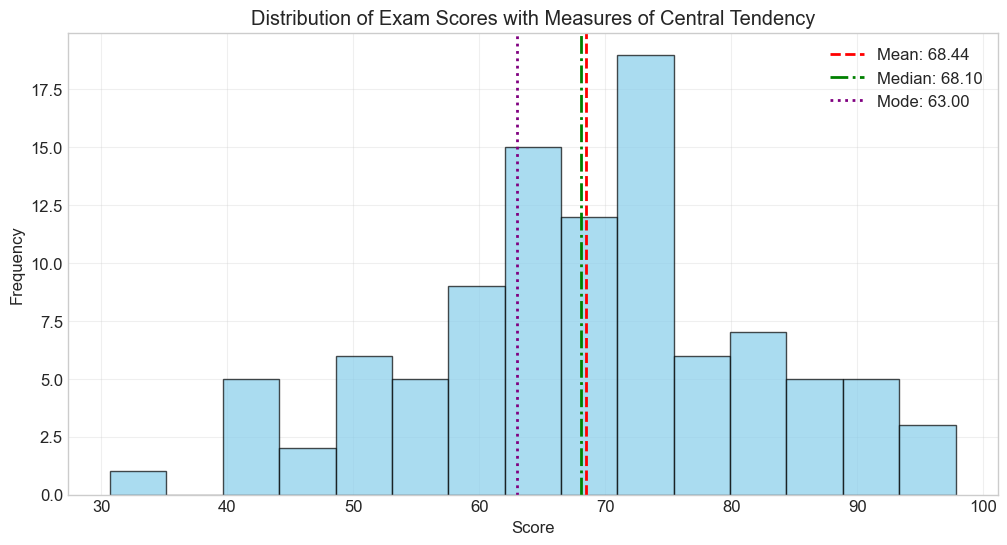

In [3]:
# Calculate measures of central tendency for exam scores
mean_score = np.mean(exam_scores)
median_score = np.median(exam_scores)
# mode_score = stats.mode(exam_scores).mode[0]
# mode_score = stats.mode(exam_scores).mode  # No [0] if already scalar

# Compute mode correctly for recent versions of SciPy
mode_result = stats.mode(exam_scores, keepdims=True)  # Explicitly keepdims=True
mode_score = mode_result.mode[0]

print(f"Exam Scores Summary:")
print(f"Mean: {mean_score:.2f}")
print(f"Median: {median_score:.2f}")
print(f"Mode: {mode_score:.2f}")

# Visualize the central tendency
plt.figure(figsize=(12, 6))
plt.hist(exam_scores, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(mean_score, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_score:.2f}')
plt.axvline(median_score, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_score:.2f}')
plt.axvline(mode_score, color='purple', linestyle=':', linewidth=2, label=f'Mode: {mode_score:.2f}')
plt.legend()
plt.title('Distribution of Exam Scores with Measures of Central Tendency')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

### When to use which measure?

- **Mean**: Best for symmetrically distributed data without extreme outliers
- **Median**: Preferred for skewed data or data with outliers (resistant to extreme values)
- **Mode**: Useful for categorical data or when identifying most common values

Let's compare these measures across our different datasets:

In [4]:
# Compare mean and median for different distributions
datasets = {
    'Exam Scores (Normal)': exam_scores,
    'Income (Right Skewed)': income_data,
    'Height (Bimodal)': height_data
}

comparison = {}
for name, data in datasets.items():
    comparison[name] = {
        'Mean': np.mean(data),
        'Median': np.median(data),
        'Difference': np.mean(data) - np.median(data)
    }
    
pd.DataFrame(comparison).T

,Mean,Median,Difference
Exam Scores (Normal),68.44,68.10,0.34
Income (Right Skewed),46999.07,35403.76,11595.32
Height (Bimodal),167.64,166.40,1.24


## 4. Measures of Dispersion

While central tendency measures tell us about the center of our data, dispersion measures tell us about the spread or variability. Key measures include:

1. **Range**: The difference between the maximum and minimum values
2. **Variance**: The average of squared deviations from the mean
3. **Standard Deviation**: The square root of variance (same units as original data)
4. **Interquartile Range (IQR)**: The range of the middle 50% of values
5. **Percentiles**: Values that divide the data into hundredths

Exam Scores Dispersion:
Range: 67.10
Variance: 183.78
Standard Deviation: 13.56
Interquartile Range: 15.07
1st Quartile (25th percentile): 61.00
3rd Quartile (75th percentile): 76.07


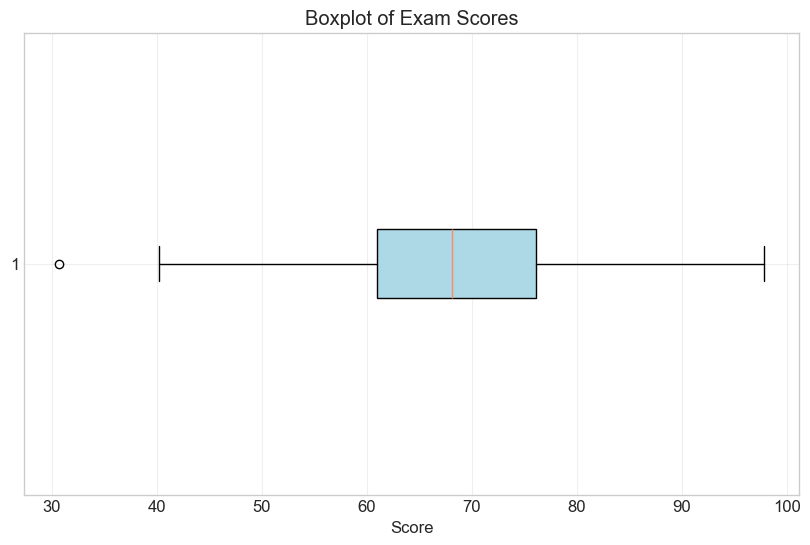

In [5]:
# Calculate measures of dispersion for exam scores
range_score = np.max(exam_scores) - np.min(exam_scores)
variance_score = np.var(exam_scores)
std_score = np.std(exam_scores)
q1 = np.percentile(exam_scores, 25)
q3 = np.percentile(exam_scores, 75)
iqr = q3 - q1

print(f"Exam Scores Dispersion:")
print(f"Range: {range_score:.2f}")
print(f"Variance: {variance_score:.2f}")
print(f"Standard Deviation: {std_score:.2f}")
print(f"Interquartile Range: {iqr:.2f}")
print(f"1st Quartile (25th percentile): {q1:.2f}")
print(f"3rd Quartile (75th percentile): {q3:.2f}")

# Visualize with boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(exam_scores, vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot of Exam Scores')
plt.xlabel('Score')
plt.grid(True, alpha=0.3)
plt.show()

## 5. Measures of Shape

Shape measures describe the data distribution's form:

1. **Skewness**: Measures symmetry or asymmetry of the distribution
   - Positive skew: Right tail is longer (mean > median)
   - Negative skew: Left tail is longer (mean < median)
   - Zero skew: Symmetric distribution (mean ≈ median)

2. **Kurtosis**: Measures the "tailedness" of the distribution
   - High kurtosis: Heavy tails, more outliers
   - Low kurtosis: Light tails, fewer outliers

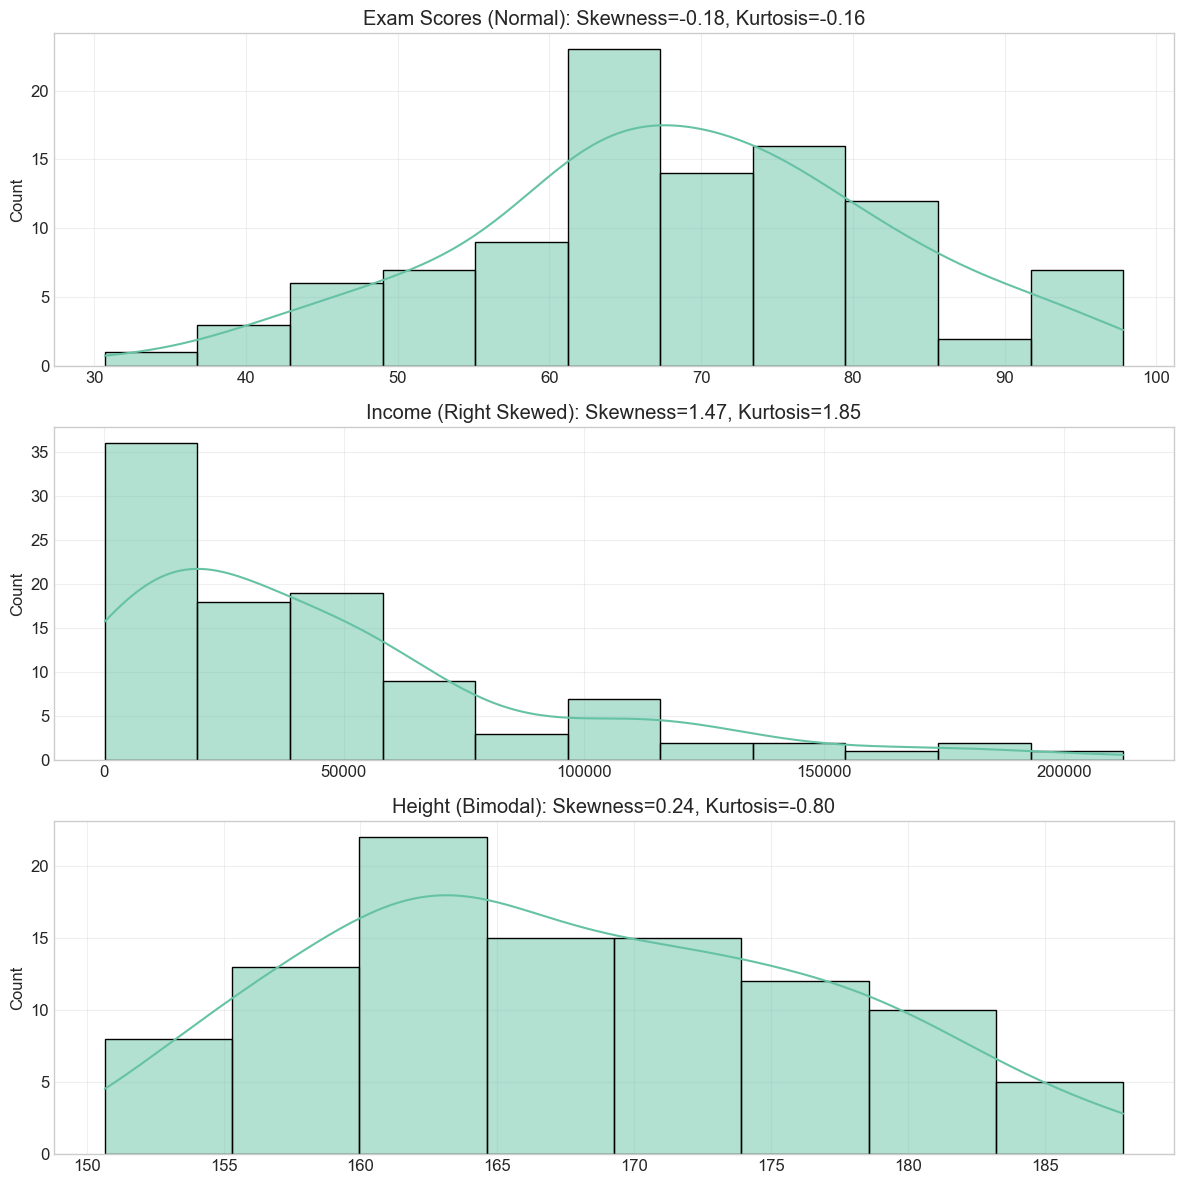

In [6]:
# Calculate shape measures for our datasets
shape_stats = {}
for name, data in datasets.items():
    shape_stats[name] = {
        'Skewness': stats.skew(data),
        'Kurtosis': stats.kurtosis(data)
    }
    
shape_df = pd.DataFrame(shape_stats).T
shape_df

# Visualize distributions with different shapes
fig, axs = plt.subplots(3, 1, figsize=(12, 12))
for i, (name, data) in enumerate(datasets.items()):
    sns.histplot(data, kde=True, ax=axs[i])
    axs[i].set_title(f'{name}: Skewness={shape_df.loc[name, "Skewness"]:.2f}, Kurtosis={shape_df.loc[name, "Kurtosis"]:.2f}')
    axs[i].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Descriptive Statistics with Pandas

Pandas provides several built-in methods for calculating descriptive statistics on DataFrames:

In [7]:
# Get summary statistics for our student dataset
student_data.describe()

# Include categorical data
student_data.describe(include='all')

# Specific statistics for a column
student_data['Grade'].describe()

count    100.00
mean      74.40
std       14.99
min       50.00
25%       61.00
50%       74.00
75%       88.00
max       99.00
Name: Grade, dtype: float64

## 7. Descriptive Statistics by Groups

Often we want to compare statistics across different groups in our data:

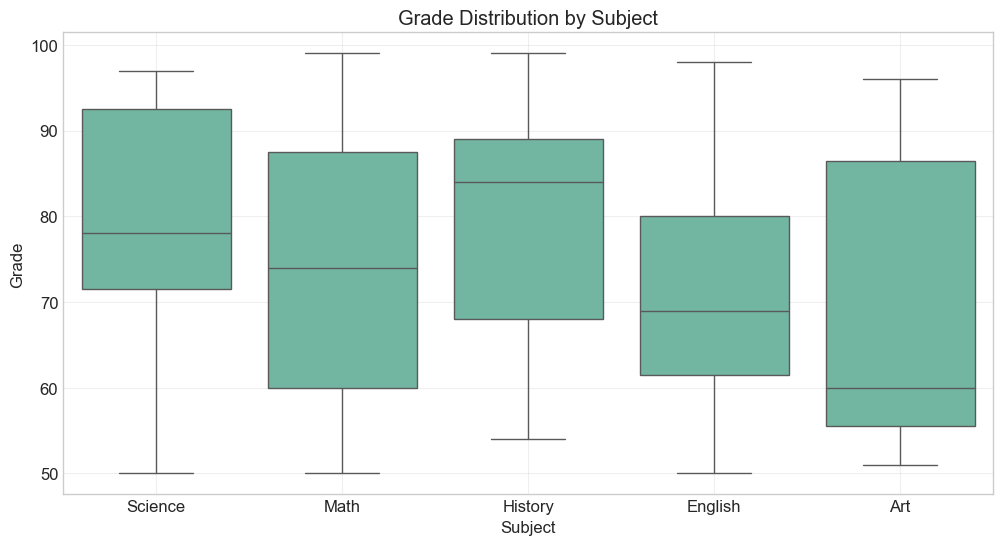

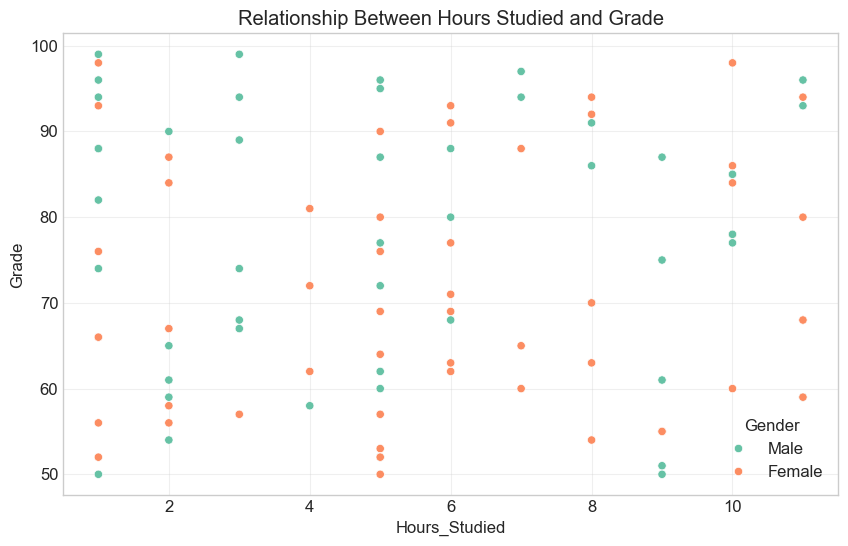

In [8]:
# Compare grades by subject
subject_stats = student_data.groupby('Subject')['Grade'].describe()
subject_stats

# Compare grades by gender
gender_stats = student_data.groupby('Gender')['Grade'].describe()
gender_stats

# Visualize group comparisons
plt.figure(figsize=(12, 6))
sns.boxplot(x='Subject', y='Grade', data=student_data)
plt.title('Grade Distribution by Subject')
plt.grid(True, alpha=0.3)
plt.show()

# Examine relationship between hours studied and grade
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Grade', hue='Gender', data=student_data)
plt.title('Relationship Between Hours Studied and Grade')
plt.grid(True, alpha=0.3)
plt.show()

## 8. Correlation Analysis

Correlation measures the strength and direction of the linear relationship between variables:

Correlation between Hours Studied and Grade: 0.03


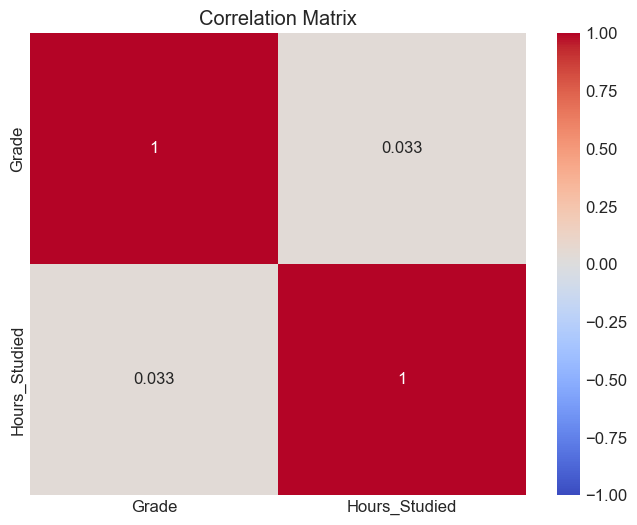

In [9]:
# Add a new column for visualization
student_data['Passed'] = student_data['Grade'] >= 60

# Calculate correlation between Hours_Studied and Grade
correlation = student_data['Hours_Studied'].corr(student_data['Grade'])
print(f"Correlation between Hours Studied and Grade: {correlation:.2f}")

# Correlation matrix for numerical variables
correlation_matrix = student_data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## 9. Practical Application

Let's apply all these concepts to analyze a real dataset. We'll use the Iris flower dataset, a classic dataset in statistics and machine learning:

In [10]:
# # Load the Iris dataset
# from sklearn.datasets import load_iris
# iris = load_iris()
# iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# # Display the first few rows
# iris_df.head()

# # Get comprehensive descriptive statistics
# iris_stats = iris_df.describe()
# iris_stats

# # Descriptive statistics by species
# species_stats = iris_df.groupby('species').describe().transpose()
# species_stats

# # Visualize the distributions by species
# plt.figure(figsize=(15, 10))
# for i, feature in enumerate(iris.feature_names):
#     plt.subplot(2, 2, i+1)
#     for species in iris.target_names:
#         sns.kdeplot(iris_df[iris_df['species'] == species][feature], label=species)
#     plt.title(f'Distribution of {feature}')
#     plt.legend()
# plt.tight_layout()
# plt.show()

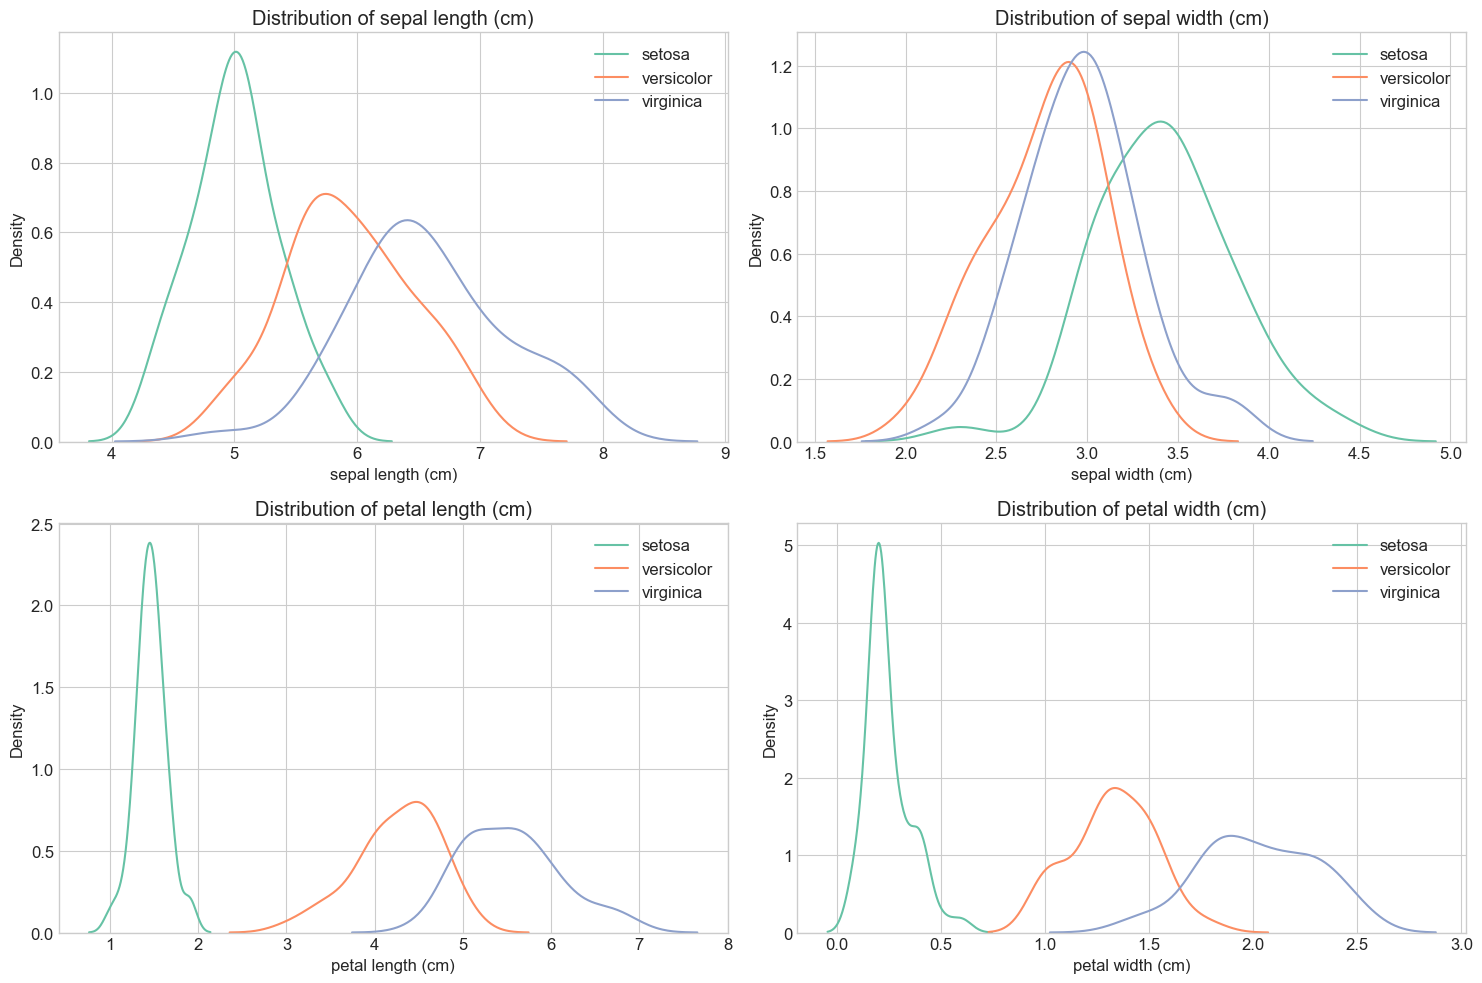

In [11]:
# Load the Iris dataset
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display the first few rows
iris_df.head()

# Get comprehensive descriptive statistics
iris_stats = iris_df.describe()
iris_stats

# Descriptive statistics by species (silence FutureWarning)
species_stats = iris_df.groupby('species', observed=False).describe().transpose()
species_stats

# Visualize the distributions by species
plt.figure(figsize=(15, 10))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    for species in iris.target_names:
        sns.kdeplot(iris_df[iris_df['species'] == species][feature], label=species)
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

## 10. Summary

Descriptive statistics provide essential tools for understanding data:

- **Measures of Central Tendency**: Mean, median, and mode help identify typical values
- **Measures of Dispersion**: Range, variance, standard deviation, and IQR describe data spread
- **Measures of Shape**: Skewness and kurtosis characterize distribution symmetry and tailedness
- **Group Comparisons**: Analyzing statistics across categories reveals patterns
- **Correlation**: Quantifies relationships between variables

Key takeaways:
1. Always explore your data with descriptive statistics before advanced analysis
2. Choose appropriate measures based on your data distribution
3. Combine numerical statistics with visualizations for better understanding
4. Consider the context when interpreting statistics
5. Be aware of how outliers can affect different statistical measures

Descriptive statistics form the foundation for inferential statistics and more complex data analysis techniques.